# URBANSOUND8K Classification

This project aims to build a machine learning model with CNN algorithm to classify sounds.

## Dataset

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music.

https://urbansounddataset.weebly.com/urbansound8k.html

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data="/content/drive/MyDrive/spectrograms"

In [4]:
data_generator=ImageDataGenerator(rescale=1./255,#0,1
                                  validation_split =0.3)

In [5]:
train_data =data_generator.flow_from_directory(data,
                                batch_size=128,
                                target_size=(250,144),
                                class_mode ="categorical",
                                seed=1,
                                subset ="training")
test_data =data_generator.flow_from_directory(data,
                                batch_size=128,
                                target_size=(250,144),
                                class_mode ="categorical",
                                seed=1,
                                subset="validation")

Found 6114 images belonging to 10 classes.
Found 2618 images belonging to 10 classes.


In [ ]:
model_0= tf.keras.Sequential([
                              tf.keras.layers.Conv2D(filters=24, kernel_size=(5,5), strides=(2, 2), activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(3,3)),
                              tf.keras.layers.Conv2D(filters = 36 , kernel_size =(4,4), strides=(2, 2), activation="relu"),
                              tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)),
                              tf.keras.layers.Conv2D(filters = 48 , kernel_size =(3,3), strides=(2, 2),activation="relu"),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(64,activation='relu'),
                              tf.keras.layers.Dense(10,activation='softmax')
])


In [ ]:
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
history_0=model_0.fit(
    train_data,    
    epochs=10,
    batch_size=128,
    validation_data=test_data
)

Epoch 1/10
48/48 [==============================] - 3708s 79s/step - loss: 2.0262 - accuracy: 0.2501 - val_loss: 1.7359 - val_accuracy: 0.3606
Epoch 2/10
48/48 [==============================] - 92s 2s/step - loss: 1.5600 - accuracy: 0.4447 - val_loss: 1.3994 - val_accuracy: 0.4626
Epoch 3/10
48/48 [==============================] - 91s 2s/step - loss: 1.3058 - accuracy: 0.5507 - val_loss: 1.2770 - val_accuracy: 0.5222
Epoch 4/10
48/48 [==============================] - 94s 2s/step - loss: 1.1259 - accuracy: 0.6145 - val_loss: 1.1437 - val_accuracy: 0.5569
Epoch 5/10
48/48 [==============================] - 113s 2s/step - loss: 1.0100 - accuracy: 0.6428 - val_loss: 1.0640 - val_accuracy: 0.6016
Epoch 6/10
48/48 [==============================] - 97s 2s/step - loss: 0.9469 - accuracy: 0.6711 - val_loss: 1.1617 - val_accuracy: 0.5749
Epoch 7/10
48/48 [==============================] - 97s 2s/step - loss: 0.8555 - accuracy: 0.7079 - val_loss: 1.0663 - val_accuracy: 0.6089
Epoch 8/10
48/48

In [ ]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="validation loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="validation accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend;

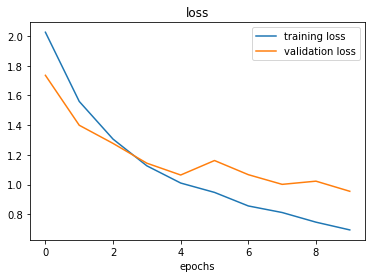

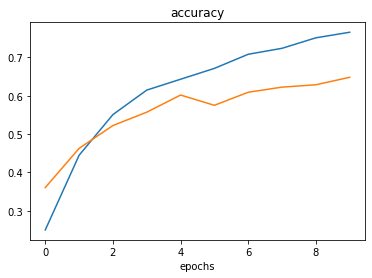

In [ ]:
plot_loss_curves(history_0)

In [ ]:
model_0.evaluate(test_data)

21/21 [==============================] - 23s 1s/step - loss: 0.9543 - accuracy: 0.6478


[0.9543344974517822, 0.6478227376937866]

## Transfer Learning

In [6]:
import tensorflow_hub as hub

In [7]:
model_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
resnet_layer = hub.KerasLayer(model_url, trainable=False)

In [8]:
model = tf.keras.Sequential([
    resnet_layer,
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = "adam",
              metrics = ["accuracy"])

In [9]:
history = model.fit(
    train_data,
    epochs = 10,
    validation_data = test_data)

Epoch 1/10
48/48 [==============================] - 2536s 53s/step - loss: 1.4335 - accuracy: 0.5105 - val_loss: 1.0182 - val_accuracy: 0.6784
Epoch 2/10
48/48 [==============================] - 54s 1s/step - loss: 0.8770 - accuracy: 0.7192 - val_loss: 0.8805 - val_accuracy: 0.7093
Epoch 3/10
48/48 [==============================] - 54s 1s/step - loss: 0.7292 - accuracy: 0.7735 - val_loss: 0.8203 - val_accuracy: 0.7273
Epoch 4/10
48/48 [==============================] - 53s 1s/step - loss: 0.6442 - accuracy: 0.8013 - val_loss: 0.7846 - val_accuracy: 0.7257
Epoch 5/10
48/48 [==============================] - 54s 1s/step - loss: 0.5835 - accuracy: 0.8247 - val_loss: 0.7519 - val_accuracy: 0.7441
Epoch 6/10
48/48 [==============================] - 54s 1s/step - loss: 0.5381 - accuracy: 0.8366 - val_loss: 0.7555 - val_accuracy: 0.7380
Epoch 7/10
48/48 [==============================] - 54s 1s/step - loss: 0.4997 - accuracy: 0.8551 - val_loss: 0.7318 - val_accuracy: 0.7426
Epoch 8/10
48/48 